In [12]:
import glob
import os
import sys

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
data_dir = "/home/hjcho/courses/mlcancer/data"

In [14]:
files = glob.glob(os.path.join(data_dir, 'fpkm', '*.FPKM.txt'))
dfs = [pd.read_csv(f, header=None, sep='\t', names = ['gene', 'fpkm'],index_col=0) for f in files]
genedata = pd.concat(dfs, axis=1,ignore_index=True)

print(f"{genedata.shape[0]} genes and {genedata.shape[1]} samples")
genedata.head()

60483 genes and 546 samples


,0,1,2,3,4,5,6,7,8,9,...,536,537,538,539,540,541,542,543,544,545
gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000242268.2,0.120151,0.000000,0.000000,0.000000,0.000000,0.000000,0.021057,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.221941,0.000000,0.00000,0.000000,0.000000,0.000000,0.016880
ENSG00000270112.3,0.002779,0.000000,0.189525,0.006299,0.000000,0.004356,0.002922,0.046116,0.000000,0.000000,...,0.000000,0.000000,0.002812,0.000000,0.000000,0.00000,0.000000,0.005275,0.003746,0.002342
ENSG00000167578.15,1.657602,1.748100,1.088430,0.875946,1.101024,1.188802,4.169619,6.287472,3.669993,1.706968,...,3.230684,2.513745,3.555977,4.174030,0.720214,2.44497,4.659179,2.317317,6.339140,4.005991
ENSG00000273842.1,0.000000,0.000000,0.000000,0.247922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
ENSG00000078237.5,4.209377,3.980859,2.596291,8.129440,31.056887,4.139686,8.328435,3.692232,3.671295,5.106108,...,3.656498,10.006975,6.135165,4.229688,0.740502,6.71132,1.993417,5.433212,4.863423,4.039760


In [15]:
# Filter out genes that are not expressed across all samples
genedata = genedata[(genedata > 0).any(axis=1)]
print(f"{genedata.shape[0]} genes and {genedata.shape[1]} samples")

57940 genes and 546 samples


In [16]:
# Filter out genes that are only expressed in less than or equal to 100 samples
genedata = genedata[(genedata>0).sum(axis=1)>100]
print(f"{genedata.shape[0]} genes and {genedata.shape[1]} samples")

38364 genes and 546 samples


In [17]:
# Transpose the data to cluster across rows (samples)
X = genedata.T

Text(0.5, 0, 'pca-three')

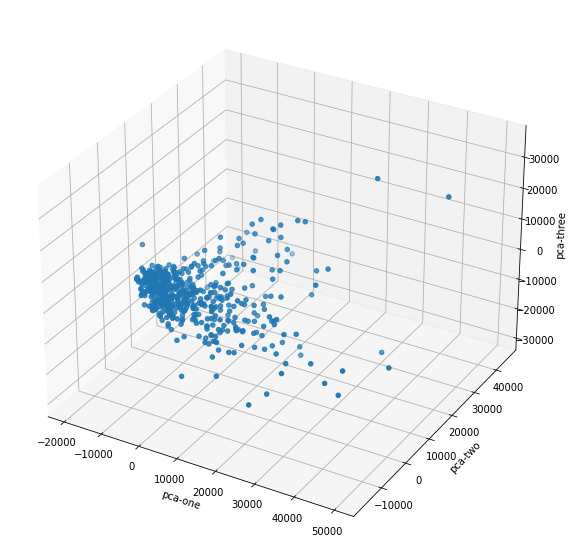

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Visualize the data before clustering
pca = PCA(n_components=3).fit(X)
pca_3d = pca.transform(X)
ax = plt.figure(figsize=(16, 10)).gca(projection='3d')
s = ax.scatter(
    xs=pca_3d[:,0],
    ys=pca_3d[:,1],
    zs=pca_3d[:,2]
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

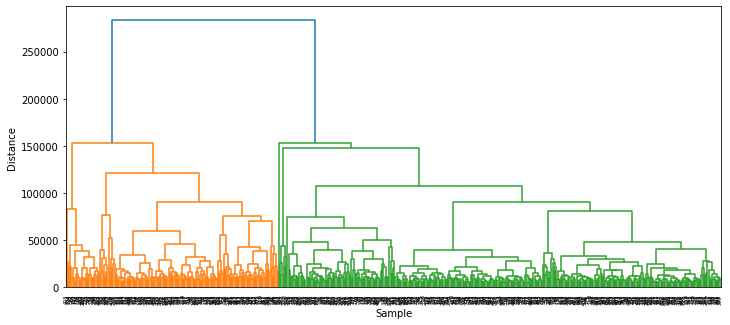

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical clustering to reveal possible clusters based on gene expression
Z = linkage(X, method='ward', metric='euclidean')

plt.figure(figsize=(10, 6))
ax = plt.subplot()
plt.subplots_adjust(left=0.07, bottom=0.3, right=0.98, top=0.95,
wspace=0, hspace=0)
plt.xlabel('Sample')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

In [20]:
def plot_clusters(X,y,n_components):
    """Performs PCA and visualizes the data in either a 2D or 3D plot."""
    
    np.random.seed(0)
    if n_components==2:
        pca=PCA(n_components=2).fit(X)
        pca_2d = pca.transform(X)
        plt.figure(figsize=(25, 10))
        s = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y, cmap='viridis')
        
    elif n_components==3:
        pca = PCA(n_components=3).fit(X)
        pca_3d = pca.transform(X)
        ax = plt.figure(figsize=(16, 10)).gca(projection='3d')
        s = ax.scatter(
            xs=pca_3d[:,0],
            ys=pca_3d[:,1],
            zs=pca_3d[:,2],
            c=y,
            cmap='viridis'
        )
        ax.set_xlabel('pca-one')
        ax.set_ylabel('pca-two')
        ax.set_zlabel('pca-three')
        
    else:
        print("Invalid number of components.")
        
    plt.legend(*s.legend_elements(), loc=1)
    plt.show()

In [26]:
def cluster(method, n_clusters, X):
    """Cluster the data with various clustering methods."""
    
    if method=='kmeans':
        from sklearn.cluster import KMeans
        model = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
        y=model.labels_
        
    elif method=='agglomerative':
        from sklearn.cluster import AgglomerativeClustering
        model = AgglomerativeClustering(n_clusters=n_clusters).fit(X)
        y=model.labels_

    else:
        print('Invalid clustering method')
        sys.exit()
    plot_clusters(X,y,3)
    if n_clusters>1:
        from sklearn import metrics
        print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, y))
        print("Davies Bouldin Score: %0.3f" % metrics.davies_bouldin_score(X,y))
        print("Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(X,y))
    return model

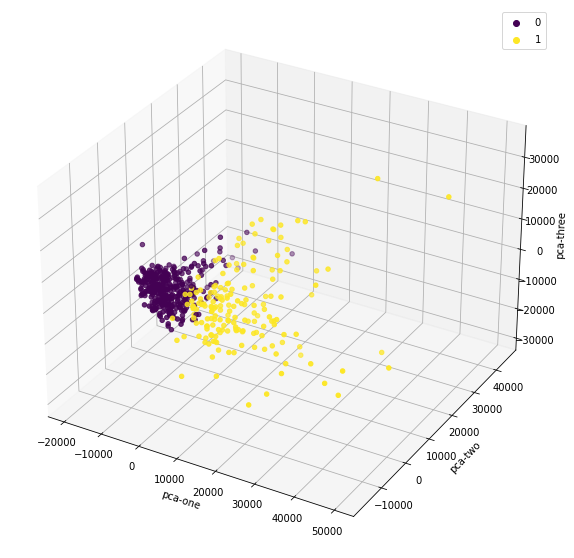

Silhouette Coefficient: 0.282
Davies Bouldin Score: 1.584
Calinski Harabasz Score: 153.555


AgglomerativeClustering()

In [27]:
cluster('agglomerative', 2, X)

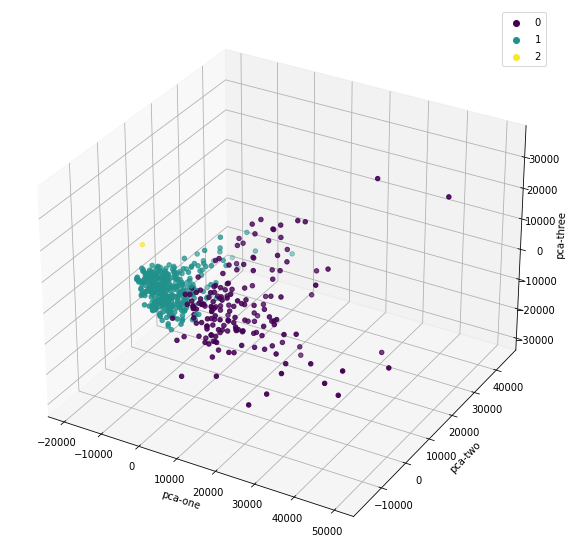

Silhouette Coefficient: 0.286
Davies Bouldin Score: 1.099
Calinski Harabasz Score: 107.974


AgglomerativeClustering(n_clusters=3)

In [24]:
cluster('agglomerative', 3, X)

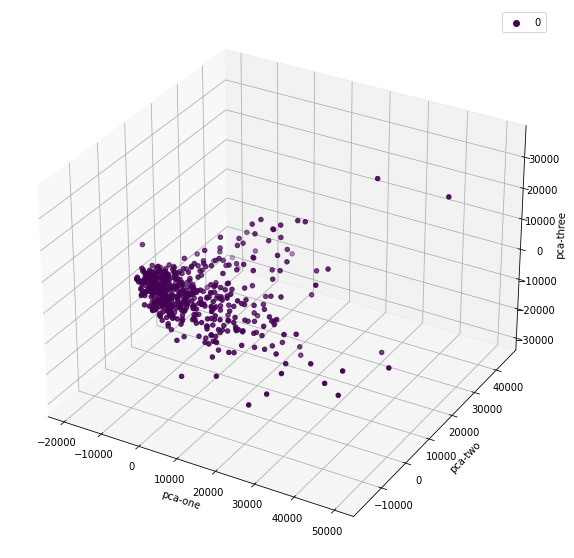

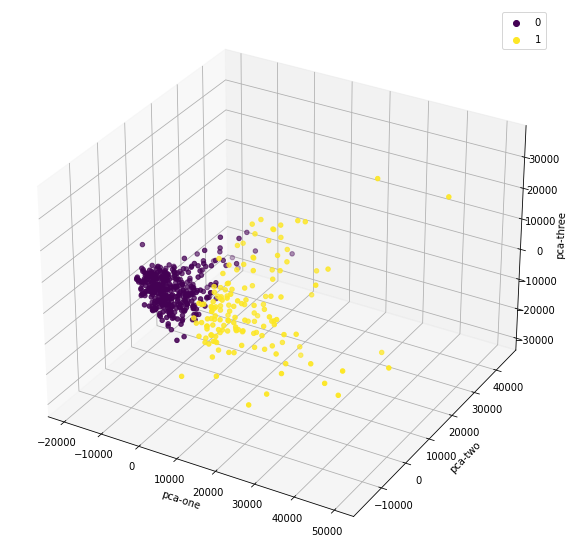

Silhouette Coefficient: 0.311
Davies Bouldin Score: 1.532
Calinski Harabasz Score: 157.722


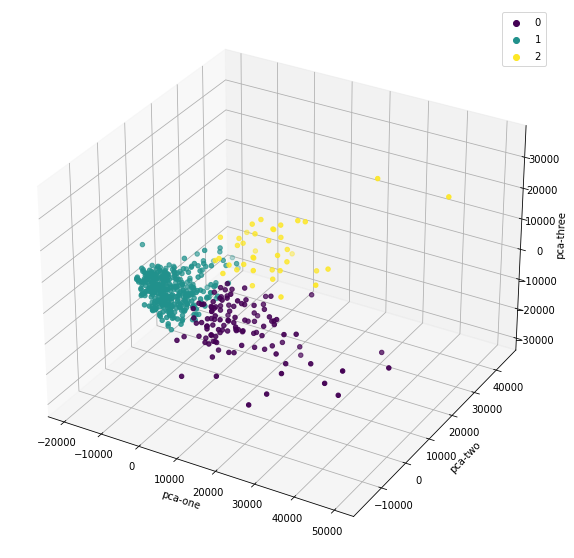

Silhouette Coefficient: 0.311
Davies Bouldin Score: 1.527
Calinski Harabasz Score: 111.684


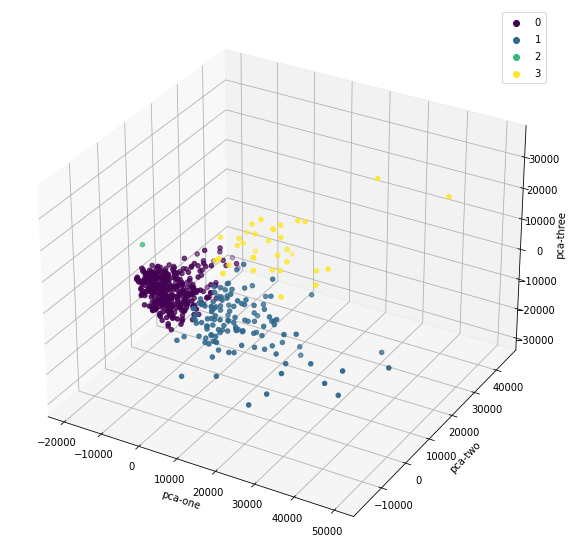

Silhouette Coefficient: 0.308
Davies Bouldin Score: 1.155
Calinski Harabasz Score: 100.006


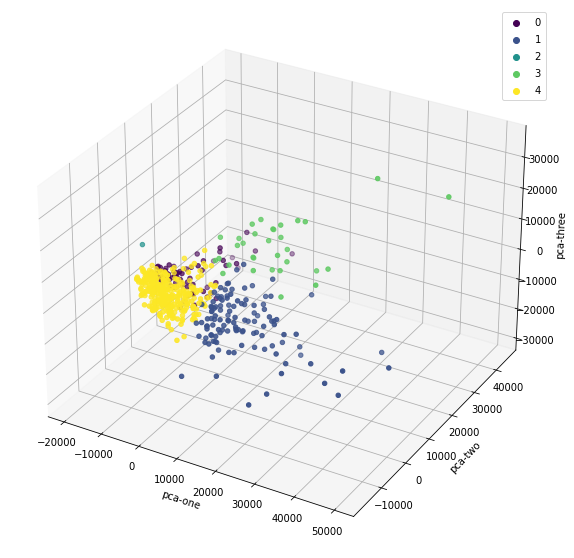

Silhouette Coefficient: 0.240
Davies Bouldin Score: 1.323
Calinski Harabasz Score: 96.989


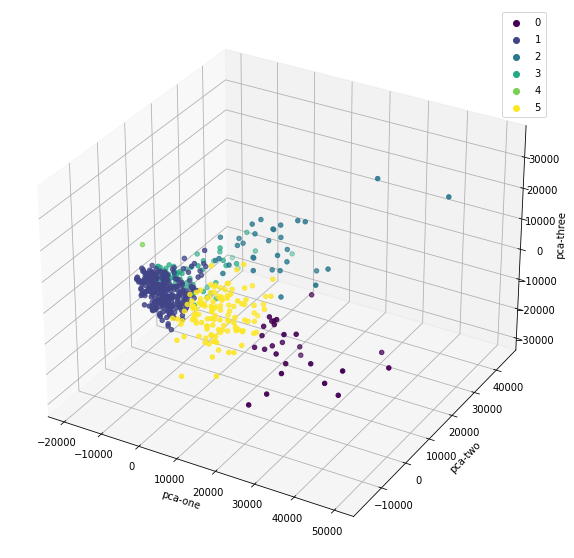

Silhouette Coefficient: 0.211
Davies Bouldin Score: 1.384
Calinski Harabasz Score: 92.176


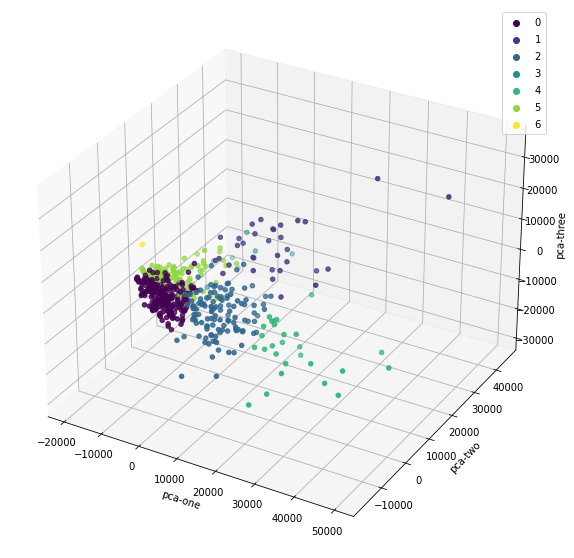

Silhouette Coefficient: 0.140
Davies Bouldin Score: 1.451
Calinski Harabasz Score: 89.731


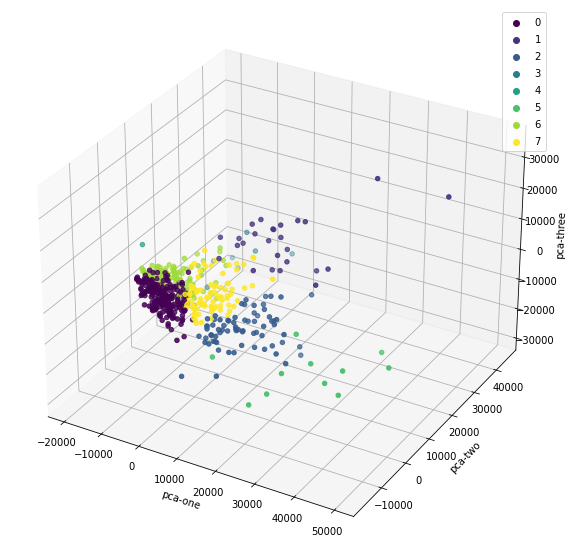

Silhouette Coefficient: 0.135
Davies Bouldin Score: 1.528
Calinski Harabasz Score: 84.210


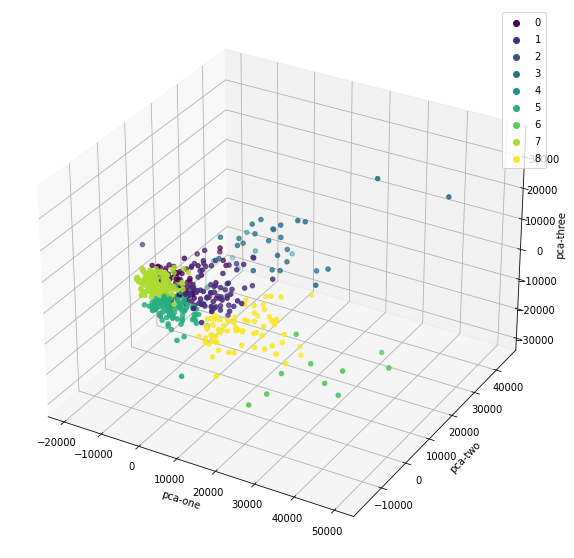

Silhouette Coefficient: 0.106
Davies Bouldin Score: 1.573
Calinski Harabasz Score: 79.961


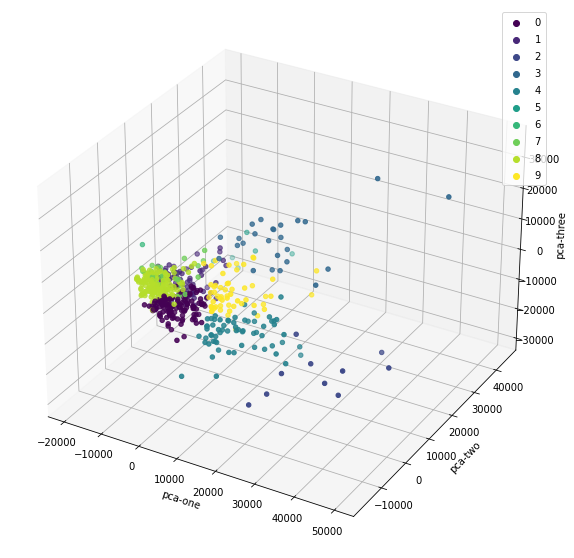

Silhouette Coefficient: 0.115
Davies Bouldin Score: 1.575
Calinski Harabasz Score: 76.213


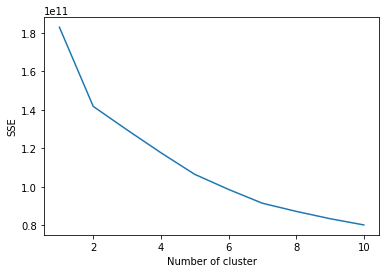

In [23]:
# Create elbow plot for various k values
sse={}
for k in range(1,11):
    model = cluster('kmeans', k, X)
    sse[k] = model.inertia_
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()